---
title: "filtering 3"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: false
    code-summary: "Show the code"
---

Now lets apply filtering to another dataset. Do you remember the phrase "I like to eat hummus"? When we applied dynamic time warping to that recording we messesed up with the samplerate to make the computation faster but the end result didn't sound that clear. No that we know FFT and filtering, lets try to make it sound clearer by removing unwanted frequencies.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.ensemble import RandomForestRegressor
import concurrent.futures
from datetime import datetime, timedelta
from sklearn.cluster import KMeans
import math
import scipy
from scipy import signal
from scipy.io import wavfile
from scipy.signal import find_peaks
from scipy.signal import sosfiltfilt, butter, ellip, cheby1, cheby2

# %matplotlib widget

In [2]:
filename = 'hummus2_warped.wav'
samplerate, data1 = wavfile.read(filename)

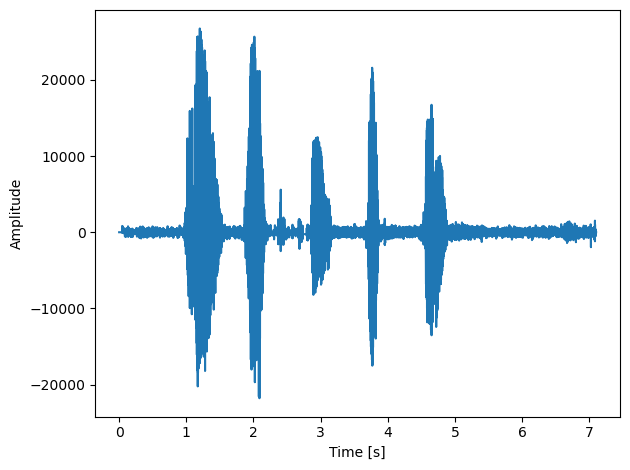

In [3]:
length = data1.shape[0] / samplerate
time = np.linspace(0., length, data1.shape[0])

fig, ax = plt.subplots()
ax.plot(time, data1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude")

plt.tight_layout()

## apply FFT

In [4]:
x = data1
dt = 1/samplerate 
N = len(x)
t=time

In [5]:
fft = scipy.fft.fft(x) / N
k = scipy.fft.fftfreq(N, dt)
fft_abs = np.abs(fft)

Keep only positive k values

In [6]:
fft_abs = fft_abs[k>=0]
k = k[k>=0]

[Text(0.5, 0, 'frequency (Hz)'),
 Text(0, 0.5, '$|F|$'),
 Text(0.5, 1.0, 'sqrt of power spectrum of $x(t)$')]

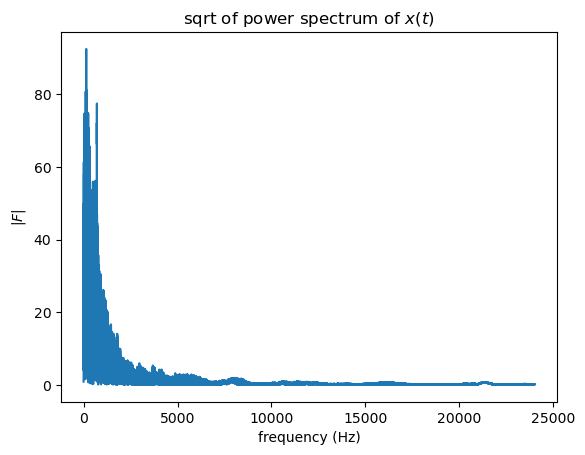

In [7]:
fig, ax = plt.subplots()
ax.plot(k, fft_abs)
ax.set(xlabel="frequency (Hz)",
       ylabel=r"$|F|$",
       title=r"sqrt of power spectrum of $x(t)$")

## apply bandpass filter
In the recording we can hear that there are some undesired low and high frequencies. In general we will choose the band frequency to match the range of a male adult, which is approximately 300-5000Hz.
![](human_voice.jpg)

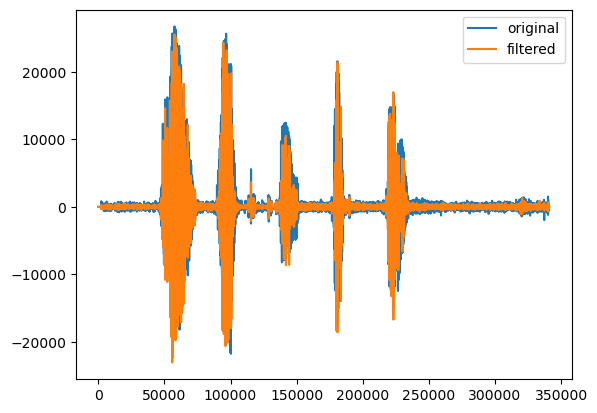

In [8]:
frequency_sample = samplerate
low = 300  
high = 3000

sos = butter(4,             #filter order = how steep is the slope
             [low, high],       # cutof value in units of the frequency sample
             btype='band',   #type of filter
             output='sos',  # "sos" stands for "Second-Order Sections." 
             fs=frequency_sample         #frequency sample = how many samples per 1 unit.
             )

# apply filter to the data:
y = sosfiltfilt(sos, x) + np.mean(x)

fig, ax = plt.subplots()
ax.plot(x, label='original')
ax.plot(y, label='filtered')
ax.legend()


In [9]:
from scipy.io.wavfile import write
write("filt_" + filename, samplerate, y.astype(np.int16))


Lets compare the two:

original  
<audio controls="controls"><source src="hummus2_warped.wav" type="audio/wav" /></audio>

filtered  
<audio controls="controls"><source src="filt_hummus2_warped.wav" type="audio/wav" /></audio>